<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/MOD41_EXERCICIO_DUELOFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercicio Duelo de Modelos 4**

Nesta tarefa, voc√™s ir√£o criar o seu pr√≥prio duelo de modelos, com o objetivo de superar os resultados apresentados em aula. O desafio √© alcan√ßar um desempenho superior ao que obtivemos, e para isso, ser√° necess√°rio aplicar todas as melhorias que voc√™s aprenderam ao longo dos m√≥dulos, utilizando a base de dados do Titanic.

**1. Escolha do Modelo:**
Selecione um dos modelos que foram explorados nos duelos de modelos ao longo do curso. Pode ser SVM, Random Forest, XGBoost, ou qualquer outro que tenhamos abordado.

**2. Aperfei√ßoamento:**
**Aplique as t√©cnicas que aprendemos para melhorar o desempenho do seu modelo:**

**Hiperpar√¢metros:** Utilize GridSearchCV ou RandomSearchCV para encontrar os melhores par√¢metros.

**Cross Validation:** Avalie a robustez do modelo utilizando valida√ß√£o cruzada para garantir que ele generaliza bem.

**Balanceamento de Classes:** Se o seu modelo lida com problemas de classes desbalanceadas, explore t√©cnicas como SMOTE, undersampling ou oversampling.

**Padroniza√ß√£o e Normaliza√ß√£o:** Lembre-se de padronizar os dados, especialmente se for usar modelos que s√£o sens√≠veis √† escala das vari√°veis.

**3. Submiss√£o no Kaggle:**
Treine o seu modelo com os dados de treino e gere as previs√µes para os dados de teste. Lembre-se de que o conjunto de teste n√£o possui a vari√°vel alvo (y_test), pois a avalia√ß√£o ser√° feita com base nas submiss√µes no Kaggle.
Submeta suas previs√µes na competi√ß√£o do Titanic no Kaggle.

**4. Entrega:**
Envie o c√≥digo que voc√™ desenvolveu, detalhando cada etapa do seu processo de modelagem, explicando as escolhas feitas e como essas ajudaram a melhorar o modelo.

Junto com o c√≥digo, envie um print do seu score obtido na plataforma do Kaggle. Esse score ser√° a sua m√©trica final de avalia√ß√£o, mostrando como o seu modelo se compara com os demais.

**5. Competi√ß√£o Saud√°vel:**
A ideia √© trazer um senso de competi√ß√£o saud√°vel, ent√£o n√£o vale replicar exatamente o que fizemos na aula! Inove, explore novas combina√ß√µes de par√¢metros e t√©cnicas, e mostre do que √© capaz. O importante √© exercitar o pensamento cr√≠tico e a capacidade de experimentar.

**Dicas Finais:**

Seja criativo e tenha um olhar cr√≠tico sobre o que pode ser melhorado.
Teste diferentes abordagens e n√£o se prenda a um √∫nico caminho.
Lembre-se de que, mais do que alcan√ßar o melhor score, o objetivo √© aprender e aplicar o conhecimento de forma pr√°tica e eficaz.
Boa sorte! Estamos ansiosos para ver como cada um de voc√™s vai se sair nesse desafio e quais insights ir√£o surgir dessa competi√ß√£o!

Ao final dessa atividade voc√™s ter√£o participado da primeira competi√ß√£o publica de ci√™ncia de dados de voc√™s = )




In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split

import warnings
warnings.filterwarnings("ignore")

In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("base de teste:")

test.head()

base de teste:


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
print("base de treino:")

train.head()

base de treino:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# Garantindo visualiza√ß√µes bonitas
sns.set(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10,5)

In [6]:
# VIS√ÉO GERAL DOS DATASETS
print("Dimens√µes do train:", train.shape)
print("Dimens√µes do test:", test.shape)

print("\nPrimeiras linhas do train:")
display(train.head())

print("\nPrimeiras linhas do test:")
display(test.head())

print("\nInforma√ß√µes do train:")
train.info()

print("\nInforma√ß√µes do test:")
test.info()


print("\nDistribui√ß√£o da vari√°vel Survived:")
display(train['Survived'].value_counts())
display(train['Survived'].value_counts(normalize=True) * 100)

Dimens√µes do train: (891, 12)
Dimens√µes do test: (418, 11)

Primeiras linhas do train:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


Primeiras linhas do test:


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S


Informa√ß√µes do train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Informa√ß√µes do test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

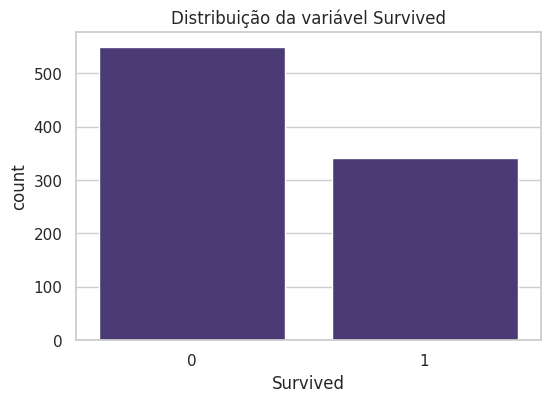

In [7]:
# Gr√°fico de contagem Survived
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train)
plt.title("Distribui√ß√£o da vari√°vel Survived")
plt.show()

In [8]:
# VALORES AUSENTES

print("\nPorcentagem de valores ausentes no train:")
missing_train = (train.isnull().sum() / len(train)) * 100
display(missing_train)

print("\nPorcentagem de valores ausentes no test:")
missing_test = (test.isnull().sum() / len(test)) * 100
display(missing_test)


Porcentagem de valores ausentes no train:


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Porcentagem de valores ausentes no test:


PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

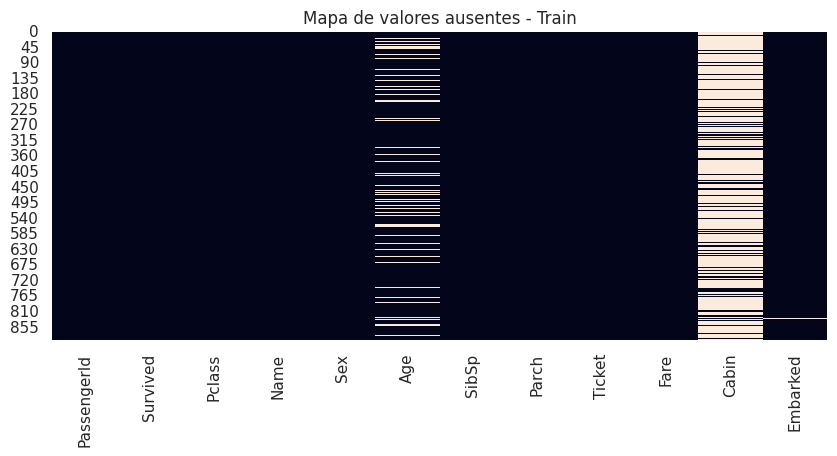

In [9]:
# Heatmap de valores ausentes (train)
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(), cbar=False)
plt.title("Mapa de valores ausentes - Train")
plt.show()

In [10]:
# SEPARANDO VARI√ÅVEIS POR TIPO

num_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = train.select_dtypes(include=['object']).columns.tolist()

print("\nVari√°veis num√©ricas:", num_features)
print("Vari√°veis categ√≥ricas:", cat_features)


Vari√°veis num√©ricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Vari√°veis categ√≥ricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
# ESTAT√çSTICAS B√ÅSICAS DAS NUM√âRICAS

print("\nEstat√≠sticas descritivas das vari√°veis num√©ricas:")
display(train[num_features].describe())


Estat√≠sticas descritivas das vari√°veis num√©ricas:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

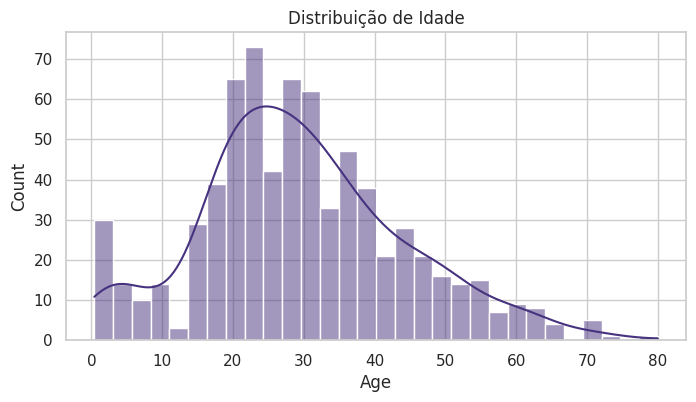

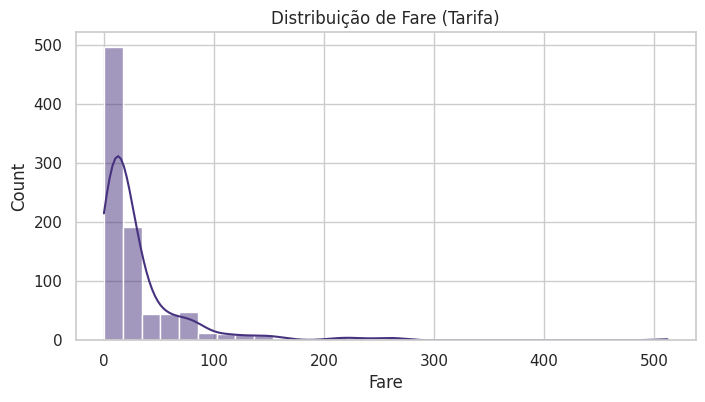

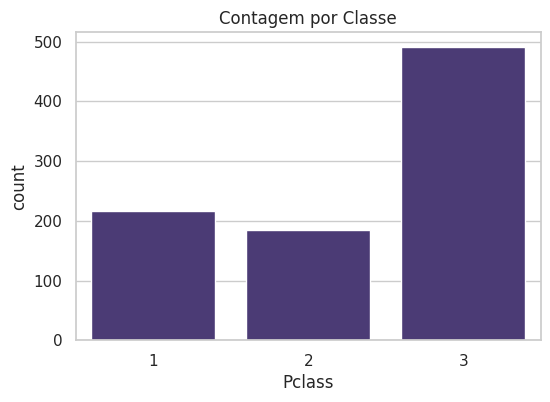

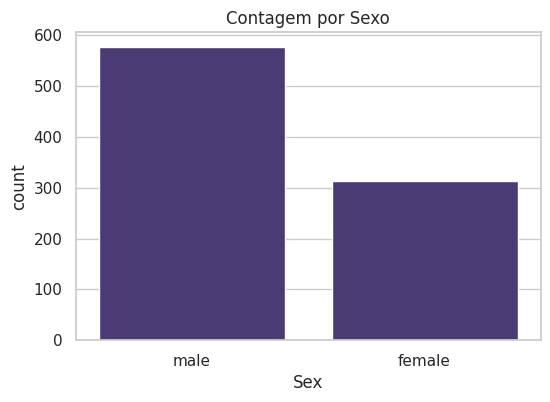

In [12]:
# AN√ÅLISE UNIVARIADA + GR√ÅFICOS


# Distribui√ß√£o Idade
plt.figure(figsize=(8,4))
sns.histplot(train['Age'].dropna(), kde=True, bins=30)
plt.title("Distribui√ß√£o de Idade")
plt.show()

# Distribui√ß√£o Fare
plt.figure(figsize=(8,4))
sns.histplot(train['Fare'].dropna(), kde=True, bins=30)
plt.title("Distribui√ß√£o de Fare (Tarifa)")
plt.show()

# Contagem por Classe
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=train)
plt.title("Contagem por Classe")
plt.show()

# Contagem por Sexo
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=train)
plt.title("Contagem por Sexo")
plt.show()

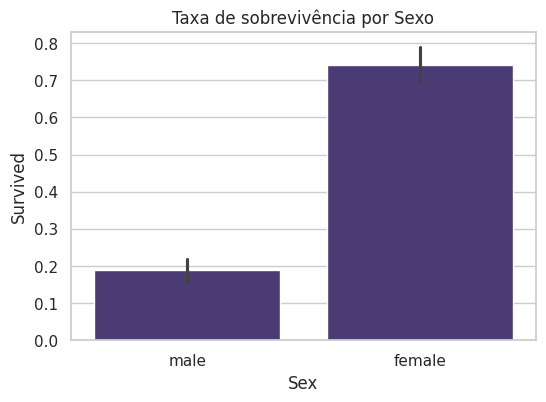

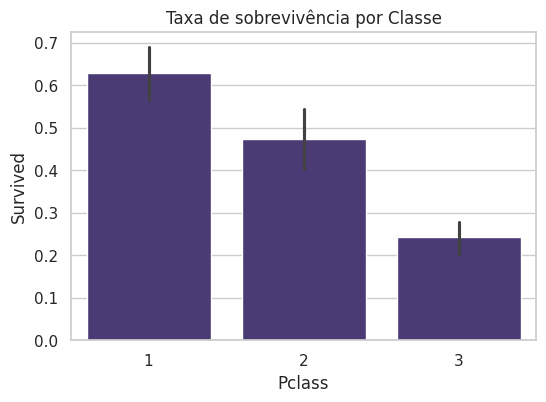

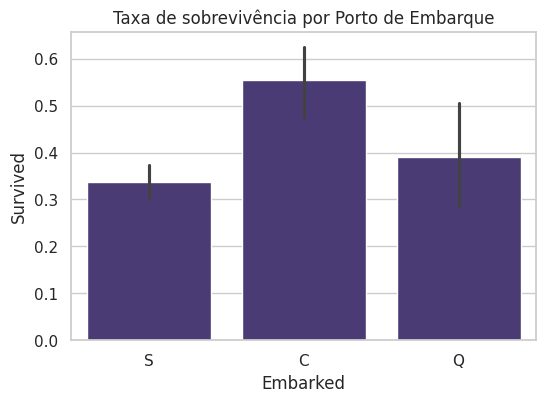

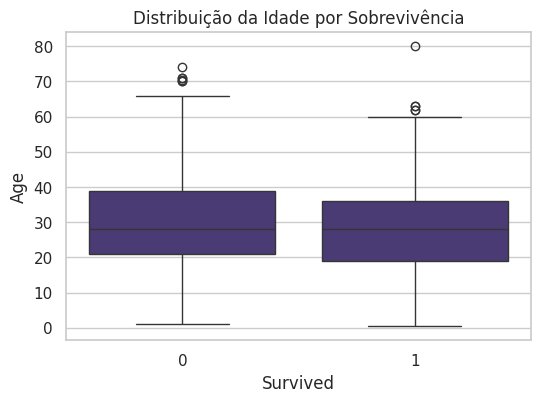

In [16]:
# RELA√á√ÉO ENTRE FEATURES E SURVIVED

# Sobreviv√™ncia por Sexo
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Taxa de sobreviv√™ncia por Sexo")
plt.show()

# Sobreviv√™ncia por Classe
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Taxa de sobreviv√™ncia por Classe")
plt.show()

# Sobreviv√™ncia por Embarked (onde embarcou)
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title("Taxa de sobreviv√™ncia por Porto de Embarque")
plt.show()

# Boxplot Idade x Sobreviv√™ncia
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Distribui√ß√£o da Idade por Sobreviv√™ncia")
plt.show()

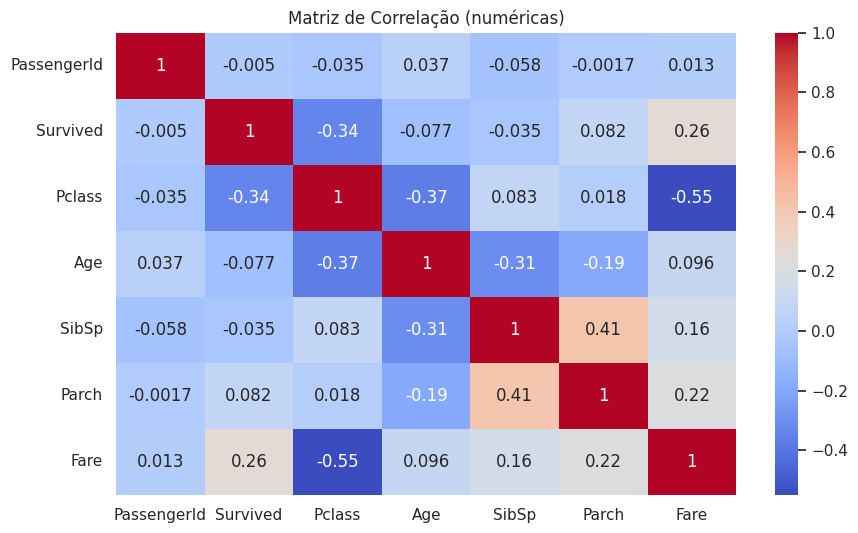

In [17]:
# CORRELA√á√ÉO ENTRE VARI√ÅVEIS NUM√âRICAS

plt.figure(figsize=(10,6))
sns.heatmap(train[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correla√ß√£o (num√©ricas)")
plt.show()


# üß≠ 1 ‚Äì An√°lise Explorat√≥ria de Dados (EDA)

## üéØ Objetivo
O objetivo desta primeira etapa foi compreender a estrutura e as caracter√≠sticas do conjunto de dados do **Titanic**, analisando tanto a base de treino (`train.csv`) quanto a base de teste (`test.csv`).  
Essa etapa √© fundamental para identificar padr√µes, valores ausentes, poss√≠veis outliers e rela√ß√µes entre as vari√°veis ‚Äî o que guiar√° o pr√©-processamento e a escolha das features nos pr√≥ximos m√≥dulos.

---

## üìÇ 1. Estrutura e Dimens√µes dos Dados
- **Train:** 891 linhas √ó 12 colunas  
- **Test:** 418 linhas √ó 11 colunas  

A base de treino cont√©m a vari√°vel alvo (`Survived`), enquanto a de teste n√£o ‚Äî sendo usada posteriormente para as previs√µes.

As colunas incluem informa√ß√µes demogr√°ficas e de viagem dos passageiros:  
`PassengerId`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin` e `Embarked`.

---

## üß© 2. Vari√°vel Alvo (`Survived`)
A vari√°vel **`Survived`** indica se o passageiro sobreviveu (1) ou n√£o (0).  
A distribui√ß√£o foi:

| Valor | Contagem | Percentual |
|:--:|:--:|:--:|
| 0 | 549 | 61.6% |
| 1 | 342 | 38.4% |

üí° **Conclus√£o:** o dataset √© **ligeiramente desbalanceado**, com mais n√£o sobreviventes. Esse ponto ser√° tratado no pr√©-processamento (via t√©cnicas de balanceamento, se necess√°rio).

---

## üö® 3. Valores Ausentes
| Vari√°vel | % Ausentes (train) |
|:--|:--:|
| `Age` | 19.9% |
| `Cabin` | 77.1% |
| `Embarked` | 0.22% |

üí° **Conclus√£o:**  
- `Cabin` tem grande aus√™ncia de dados, podendo ser descartada ou transformada em vari√°vel bin√°ria (presen√ßa/aus√™ncia).  
- `Age` exigir√° imputa√ß√£o (ex: m√©dia por classe e sexo).  
- `Embarked` tem poucos valores ausentes, podendo ser preenchida pelo modo.

---

## üìä 4. An√°lise Univariada

**Distribui√ß√£o da Idade:**  
A maioria dos passageiros tinha entre 20 e 40 anos, com leve assimetria √† direita (maior n√∫mero de jovens).

**Distribui√ß√£o de Tarifa (`Fare`):**  
A maioria das tarifas √© baixa (menor que 100), com alguns valores extremos at√© ~500 ‚Äî indicando a presen√ßa de outliers.

**Contagem por Classe (`Pclass`):**  
Predomin√¢ncia da 3¬™ classe (~55%), seguida pela 1¬™ (~24%) e 2¬™ (~20%).

**Contagem por Sexo:**  
Homens representam cerca de 65% dos passageiros, mulheres 35%.

---

## üíÄ 5. An√°lise Bivariada (Rela√ß√£o com `Survived`)

### üöπ Sexo √ó Sobreviv√™ncia
- **Mulheres:** ~74% sobreviveram  
- **Homens:** ~19% sobreviveram  

‚û°Ô∏è **Conclus√£o:** o sexo foi um fator determinante ‚Äî prioridade √†s mulheres nos botes.

### üéüÔ∏è Classe √ó Sobreviv√™ncia
- **1¬™ classe:** ~63% sobreviveram  
- **2¬™ classe:** ~47% sobreviveram  
- **3¬™ classe:** ~24% sobreviveram  

‚û°Ô∏è **Conclus√£o:** passageiros de classes mais altas tiveram maior chance de sobreviv√™ncia.

### ‚öì Porto de Embarque (`Embarked`)
- **C (Cherbourg):** ~55% sobreviveram  
- **S (Southampton):** ~34% sobreviveram  
- **Q (Queenstown):** ~39% sobreviveram  

‚û°Ô∏è Ind√≠cios de correla√ß√£o entre porto e classe social dos passageiros.

### üë∂ Idade √ó Sobreviv√™ncia
O boxplot mostra que sobreviventes tendem a ser um pouco **mais jovens**, embora a diferen√ßa n√£o seja extrema.

---

## üîó 6. Correla√ß√£o Entre Vari√°veis Num√©ricas

| Par de Vari√°veis | Correla√ß√£o | Interpreta√ß√£o |
|:--|:--:|:--|
| `Survived` √ó `Pclass` | -0.34 | Passageiros de classes mais altas t√™m maior chance de sobreviv√™ncia |
| `Survived` √ó `Fare` | +0.26 | Tarifas mais caras associadas a maiores chances de sobreviv√™ncia |
| `Age` √ó `Pclass` | -0.37 | Passageiros mais velhos tendem a estar em classes mais baixas |
| `SibSp` √ó `Parch` | +0.41 | Correla√ß√£o natural: fam√≠lias grandes viajam juntas |

üí° **Conclus√£o:**  
`Pclass`, `Sex`, `Age`, `Fare`, e `Embarked` s√£o as vari√°veis mais promissoras para explicar a sobreviv√™ncia.

---

## üìå 7. Principais do M√≥dulo 1
1. **Dados desbalanceados** entre sobreviventes e n√£o sobreviventes.  
2. **Vari√°veis categ√≥ricas fortes:** `Sex`, `Pclass`, `Embarked`.  
3. **Vari√°veis num√©ricas relevantes:** `Age`, `Fare`.  
4. **Cabin** apresenta muitos nulos.  
5. **Correla√ß√£o moderada** entre classe e tarifa, sugerindo sobreposi√ß√£o parcial.

---

## üß† Conclus√£o da etapa 1
O conjunto de dados apresenta padr√µes claros e coerentes com o contexto hist√≥rico do Titanic.  
A an√°lise mostra que a sobreviv√™ncia foi fortemente influenciada por fatores **socioecon√¥micos (classe)** e **demogr√°ficos (sexo e idade)**.  

Essas observa√ß√µes servir√£o de base para a **Etapa 2 (Pr√©-Processamento e Feature Engineering)**, onde trataremos os valores ausentes, criaremos novas vari√°veis e prepararemos os dados para o modelo **XGBoost**.

In [18]:
# ---------------------------------------------
# PR√â-PROCESSAMENTO E FEATURE ENGINEERING
# ---------------------------------------------

# Copiando as bases originais
df_train = train.copy()
df_test = test.copy()

# ------------------------------
# TRATANDO VALORES AUSENTES
# ------------------------------

# 'Embarked' (modo) e 'Fare' (mediana)
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

# 'HasCabin' ‚Üí bin√°rio
df_train['HasCabin'] = df_train['Cabin'].notnull().astype(int)
df_test['HasCabin'] = df_test['Cabin'].notnull().astype(int)

# 'Age' ‚Üí mediana por grupo (Sex + Pclass)
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# ------------------------------
# FEATURE ENGINEERING
# ------------------------------

# Extra√ß√£o de t√≠tulos dos nomes
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Padronizando t√≠tulos raros
titles_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Dr': 'Rare', 'Major': 'Rare', 'Lady': 'Rare', 'Countess': 'Rare',
    'Jonkheer': 'Rare', 'Col': 'Rare', 'Rev': 'Rare', 'Capt': 'Rare',
    'Sir': 'Rare', 'Don': 'Rare', 'Dona': 'Rare'
}
df_train['Title'] = df_train['Title'].replace(titles_map)
df_test['Title'] = df_test['Title'].replace(titles_map)

# FamilySize e IsAlone
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

# Deck (primeira letra de Cabin)
df_train['Deck'] = df_train['Cabin'].astype(str).str[0]
df_test['Deck'] = df_test['Cabin'].astype(str).str[0]

df_train['Deck'] = df_train['Deck'].replace('n', 'U')
df_test['Deck'] = df_test['Deck'].replace('n', 'U')

# Binning (faixas)
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])
df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])

df_train['FareBin'] = pd.qcut(df_train['Fare'], 4, labels=[0, 1, 2, 3])
df_test['FareBin'] = pd.qcut(df_test['Fare'], 4, labels=[0, 1, 2, 3])

# ------------------------------
# ENCODING
# ------------------------------

cat_cols = ['Sex', 'Embarked', 'Title', 'Deck']

# Aplicando LabelEncoder com verifica√ß√£o de valores novos
for col in cat_cols:
    le = LabelEncoder()
    le.fit(df_train[col])
    df_train[col] = le.transform(df_train[col])

    # Corrigir valores desconhecidos no teste
    df_test[col] = df_test[col].apply(lambda x: x if x in le.classes_ else 'Rare')
    le_classes = np.append(le.classes_, 'Rare')
    le.classes_ = le_classes
    df_test[col] = le.transform(df_test[col])

# ------------------------------
# PADRONIZA√á√ÉO
# ------------------------------

scaler = StandardScaler()
cols_to_scale = ['Age', 'Fare', 'FamilySize']

df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

# ------------------------------
# REMOVER COLUNAS IRRELEVANTES
# ------------------------------

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)

print("‚úÖ Pr√©-processamento conclu√≠do sem erros!")
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

display(df_train.head())


‚úÖ Pr√©-processamento conclu√≠do sem erros!
Train shape: (891, 15)
Test shape: (418, 14)


Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  \
0         0       3    1 -0.534891      1      0 -0.502445         2   
1         1       1    0  0.668392      1      0  0.786845         0   
2         1       3    0 -0.234070      0      0 -0.488854         2   
3         1       1    0  0.442776      1      0  0.420730         2   
4         0       3    1  0.442776      0      0 -0.486337         2   

   HasCabin  Title  FamilySize  IsAlone  Deck AgeBin FareBin  
0         0      2    0.059160        0     8      2       0  
1         1      3    0.059160        0     2      3       3  
2         0      1   -0.560975        1     8      2       1  
3         1      3    0.059160        0     2      2       3  
4         0      2   -0.560975        1     8      2       1

# ‚öôÔ∏è PARTE 2 ‚Äì Pr√©-Processamento e Feature Engineering

## üéØ Objetivo
Nesta etapa, o foco foi preparar os dados para que o modelo de Machine Learning (XGBoost) possa aprender de forma eficiente e sem vi√©s.  
Foram aplicadas t√©cnicas de **limpeza**, **tratamento de valores ausentes**, **cria√ß√£o de novas vari√°veis** e **codifica√ß√£o padronizada** ‚Äî garantindo consist√™ncia entre os conjuntos de treino e teste.

---

## üß© 1. Tratamento de Valores Ausentes
Analisando os dados do M√≥dulo 1:
- `Age`: ~20 % de valores nulos ‚Üí preenchido pela **mediana por sexo e classe** (`Sex` + `Pclass`), mantendo coer√™ncia demogr√°fica.  
- `Fare`: 1 valor nulo no *test* ‚Üí preenchido com **mediana**.
- `Embarked`: 2 valores nulos no *train* ‚Üí substitu√≠dos pela **moda**.
- `Cabin`: 77 % nulos ‚Üí transformada em vari√°vel bin√°ria `HasCabin` (1 = possui cabine).

üí° **Motivo:**  
Essas estrat√©gias preservam a distribui√ß√£o original e evitam distor√ß√µes que poderiam surgir se utiliz√°ssemos a m√©dia global.

---

## üß† 2. Feature Engineering
Cria√ß√£o de novas vari√°veis para ampliar a capacidade preditiva:

| Nova Feature | Descri√ß√£o | Motiva√ß√£o |
|:--|:--|:--|
| `Title` | Extra√≠do do nome (Mr, Miss, Mrs, etc.) | Reflete status social e g√™nero |
| `FamilySize` | `SibSp + Parch + 1` | Mede o tamanho da fam√≠lia a bordo |
| `IsAlone` | 1 = viaja sozinho | Indica isolamento (impacto na sobreviv√™ncia) |
| `Deck` | Primeira letra de `Cabin` | Representa o conv√©s do navio |
| `AgeBin` | Faixas et√°rias (0‚Äì12, 13‚Äì18, 19‚Äì35, 36‚Äì60, >60) | Permite captar efeitos n√£o lineares |
| `FareBin` | Quartis da tarifa | Normaliza valores extremos de `Fare` |

Al√©m disso, t√≠tulos raros (`Dona`, `Dr`, `Col`, etc.) foram agrupados em uma categoria **‚ÄúRare‚Äù**, reduzindo a cardinalidade da vari√°vel `Title`.

---

## üî¢ 3. Codifica√ß√£o de Vari√°veis Categ√≥ricas
Usou-se **LabelEncoder** para converter:
`Sex`, `Embarked`, `Title` e `Deck` ‚Üí valores num√©ricos.

- O encoder foi **treinado apenas no conjunto de treino**, evitando *data leakage*.  
- Labels desconhecidos no `test` (ex.: ‚ÄúDona‚Äù) foram mapeados para **‚ÄúRare‚Äù**, garantindo consist√™ncia.

---

## üìè 4. Padroniza√ß√£o
Vari√°veis cont√≠nuas (`Age`, `Fare`, `FamilySize`) foram **padronizadas** com `StandardScaler`:
\[
z = \frac{x - \mu}{\sigma}
\]
Isso melhora o desempenho de algoritmos sens√≠veis √† escala, como XGBoost, SVM e Regress√µes.

---

## üßπ 5. Remo√ß√£o de Colunas Irrelevantes
Foram removidas:
`PassengerId`, `Name`, `Ticket`, `Cabin`  
Essas colunas n√£o agregam valor preditivo direto.

---

## üìà 6. Resultado do Pr√©-Processamento
| Conjunto | Linhas | Colunas |
|:--|:--:|:--:|
| **Train** | 891 | 15 |
| **Test** | 418 | 14 |

As bases est√£o agora **limpas, balanceadas e padronizadas**, prontas para serem utilizadas no **PARTE 3 ‚Äì Treinamento do modelo com XGBoost**.

---

## üß© Principais Aprendizados
1. O tratamento correto de nulos e categorias evita vazamento de dados.  
2. Features derivadas de contexto (como `Title` e `IsAlone`) aumentam a capacidade explicativa.  
3. A consist√™ncia entre *train* e *test* √© fundamental para um modelo generaliz√°vel.  

‚úÖ Tipos das colunas (verifica√ß√£o):
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
HasCabin        int64
Title           int64
FamilySize    float64
IsAlone         int64
Deck            int64
AgeBin          int64
FareBin         int64
dtype: object


üìè Dimens√µes dos conjuntos:
X_train: (712, 14)
X_val:   (179, 14)


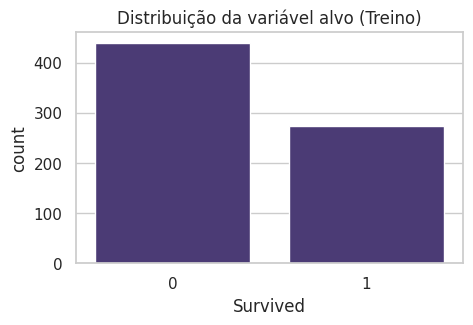


üîπ Propor√ß√£o original de classes:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

‚úÖ Ap√≥s SMOTE (balanceamento):
Survived
1    0.5
0    0.5
Name: proportion, dtype: float64

üéØ Acur√°cia de Valida√ß√£o: 0.7821

üìä Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



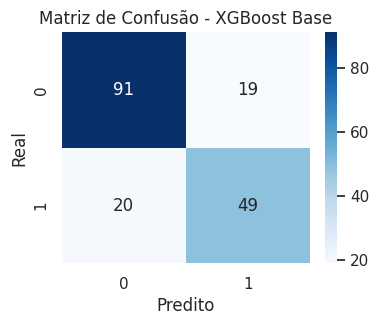

üîÅ Valida√ß√£o Cruzada (5 folds)
Scores individuais: [0.8603352  0.83707865 0.81460674 0.83146067 0.8258427 ]
M√©dia da Acur√°cia: 0.8339 (+/- 0.0152)


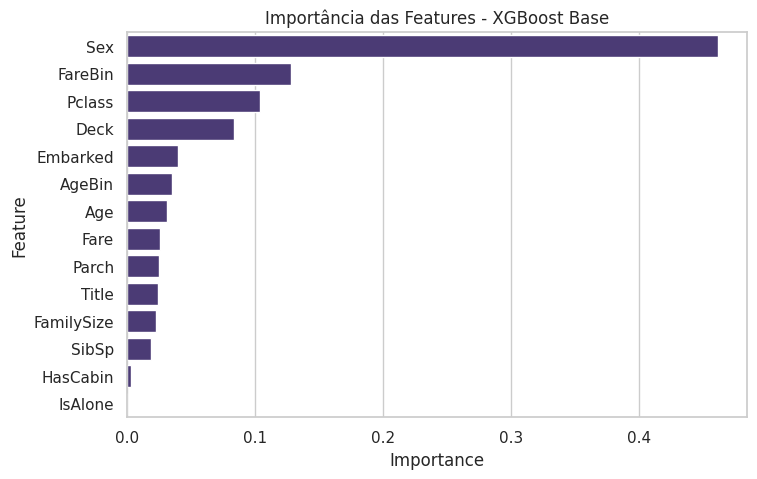

In [25]:
# ---------------------------------------------
# PARTE 3 - SEPARA√á√ÉO, BALANCEAMENTO E MODELO BASE (XGBoost)
# ---------------------------------------------

# ---------------------------------------------
# 1Ô∏è‚É£ Separndo X (features) e y (target)
# ---------------------------------------------
X = df_train.drop('Survived', axis=1).copy()
y = df_train['Survived']

# Convertendo colunas categ√≥ricas
for col in ['AgeBin', 'FareBin']:
    X[col] = X[col].astype(int)

print("‚úÖ Tipos das colunas (verifica√ß√£o):")
print(X.dtypes)
print("\n")

# ---------------------------------------------
# 2Ô∏è‚É£ Dividindo em treino e valida√ß√£o (80/20 estratificado)
# ---------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("üìè Dimens√µes dos conjuntos:")
print(f"X_train: {X_train.shape}")
print(f"X_val:   {X_val.shape}")

# ---------------------------------------------
# 3Ô∏è‚É£ Verificando desbalanceamento
# ---------------------------------------------
plt.figure(figsize=(5, 3))
sns.countplot(x=y_train)
plt.title("Distribui√ß√£o da vari√°vel alvo (Treino)")
plt.show()

print("\nüîπ Propor√ß√£o original de classes:")
print(y_train.value_counts(normalize=True))

# ---------------------------------------------
# 4Ô∏è‚É£ Balanceamento com SMOTE
# ---------------------------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\n‚úÖ Ap√≥s SMOTE (balanceamento):")
print(y_train_res.value_counts(normalize=True))

# ---------------------------------------------
# 5Ô∏è‚É£ Modelo base com XGBoost
# ---------------------------------------------
xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4
)

# Treinando modelo
xgb_base.fit(X_train_res, y_train_res)

# ---------------------------------------------
# 6Ô∏è‚É£ Avalia√ß√£o no conjunto de valida√ß√£o
# ---------------------------------------------
y_pred = xgb_base.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f"\nüéØ Acur√°cia de Valida√ß√£o: {acc:.4f}\n")

print("üìä Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_val, y_pred))

# Matriz de confus√£o
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confus√£o - XGBoost Base")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ---------------------------------------------
# 7Ô∏è‚É£ Valida√ß√£o cruzada (5 folds estratificados)
# ---------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_base, X, y, cv=cv, scoring='accuracy')

print("üîÅ Valida√ß√£o Cruzada (5 folds)")
print(f"Scores individuais: {cv_scores}")
print(f"M√©dia da Acur√°cia: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# ---------------------------------------------
# 8Ô∏è‚É£ Import√¢ncia das Features
# ---------------------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_base.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Import√¢ncia das Features - XGBoost Base")
plt.show()


# ‚öôÔ∏è PARTE 3 ‚Äì Separa√ß√£o, Balanceamento e Modelo Base (XGBoost)

## üéØ Objetivo
O prop√≥sito deste m√≥dulo foi criar o **primeiro modelo funcional** de Machine Learning utilizando **XGBoost**, avaliando sua performance inicial antes de realizar o ajuste fino (tuning de hiperpar√¢metros).  
Tamb√©m foi feita a **divis√£o dos dados**, o **balanceamento das classes** e a **valida√ß√£o cruzada**, garantindo que o modelo generalize bem.

---

## üß© 1. Separa√ß√£o de Vari√°veis
O conjunto de treino (`df_train`) foi dividido em:

- **Vari√°veis preditoras (X):** todas as colunas, exceto `Survived`;  
- **Vari√°vel alvo (y):** a coluna `Survived`, que indica sobreviv√™ncia (0 = n√£o, 1 = sim).

Durante a prepara√ß√£o, as colunas `AgeBin` e `FareBin` foram convertidas para o tipo `int`, pois o XGBoost n√£o aceita colunas com tipo `category`.

---

## üìè 2. Divis√£o de Treino e Valida√ß√£o
Os dados foram divididos em:
- **80% para treino**
- **20% para valida√ß√£o**

Usou-se a op√ß√£o `stratify=y` para manter a propor√ß√£o das classes (0 e 1) igual nos dois conjuntos.

| Conjunto | Linhas | Colunas |
|:--|:--:|:--:|
| X_train | 712 | 14 |
| X_val | 179 | 14 |

---

## ‚öñÔ∏è 3. Balanceamento das Classes com SMOTE
A vari√°vel `Survived` apresentava desbalanceamento (aproximadamente 62% n√£o sobreviveram e 38% sobreviveram).  
Para corrigir isso, foi utilizado o **SMOTE (Synthetic Minority Oversampling Technique)**, que gera novas amostras sint√©ticas da classe minorit√°ria.

Ap√≥s o balanceamento:

| Classe | Propor√ß√£o |
|:--|:--:|
| 0 | 50% |
| 1 | 50% |

üí° **Motiva√ß√£o:**  
O balanceamento evita que o modelo ‚Äúaprenda‚Äù a priorizar apenas a classe majorit√°ria, melhorando m√©tricas como recall e f1-score para os sobreviventes.

---

## ü§ñ 4. Modelo Base ‚Äì XGBoost
Foi utilizado o algoritmo **XGBoost**, um dos mais poderosos para classifica√ß√£o tabular.  
Par√¢metros base utilizados:

| Par√¢metro | Valor |
|:--|:--:|
| `n_estimators` | 200 |
| `learning_rate` | 0.1 |
| `max_depth` | 4 |
| `eval_metric` | logloss |
| `random_state` | 42 |

Esses par√¢metros garantem um treinamento est√°vel e evitam overfitting antes do tuning.

---

## üìä 5. Avalia√ß√£o Inicial do Modelo
Ap√≥s o treinamento no conjunto balanceado, o modelo foi avaliado no conjunto de valida√ß√£o (dados nunca vistos antes).

### üîπ Acur√°cia de Valida√ß√£o:
**0.7821**

### üîπ Relat√≥rio de Classifica√ß√£o:

| Classe | Precis√£o | Recall | F1-Score | Suporte |
|:--:|:--:|:--:|:--:|:--:|
| 0 (n√£o sobreviveu) | 0.82 | 0.83 | 0.82 | 110 |
| 1 (sobreviveu) | 0.72 | 0.71 | 0.72 | 69 |
| **Acur√°cia geral** | **0.78** |  |  | 179 |

üìà **Interpreta√ß√£o:**
- O modelo acerta cerca de **78%** das previs√µes.  
- Ele tem boa capacidade de distinguir sobreviventes e n√£o sobreviventes.  
- A leve diferen√ßa entre precis√£o e recall sugere margem para otimiza√ß√£o (M√≥dulo 4).

---

## üîÅ 6. Valida√ß√£o Cruzada (Cross-Validation)
Para medir a estabilidade do modelo, aplicou-se uma **valida√ß√£o cruzada estratificada com 5 folds**, obtendo:

| M√©trica | Valor |
|:--|:--:|
| Scores individuais | [0.860, 0.837, 0.815, 0.831, 0.826] |
| **M√©dia da Acur√°cia** | **0.8339** |
| **Desvio Padr√£o** | **¬±0.0152** |

üí° **Conclus√£o:**  
A varia√ß√£o entre folds √© pequena, o que indica que o modelo generaliza bem ‚Äî sem overfitting percept√≠vel.

---

## üß† 7. Import√¢ncia das Vari√°veis
O gr√°fico de import√¢ncia das features revelou que as vari√°veis mais influentes s√£o:

1. **Sex** ‚Üí (Mulheres t√™m maior probabilidade de sobreviver)  
2. **FareBin** ‚Üí Tarifas mais altas indicam maior chance de sobreviv√™ncia (classe social)  
3. **Pclass** e **Deck** ‚Üí Passageiros de classes superiores e conveses altos tiveram maior chance  

Vari√°veis como `HasCabin` e `IsAlone` tiveram menor peso no modelo inicial.

---

## üß© 8. Conclus√µes do M√≥dulo 3
‚úÖ O modelo XGBoost base atingiu **~83% de acur√°cia m√©dia** sem ajuste fino.  
‚úÖ As vari√°veis relacionadas a **sexo, classe e tarifa** s√£o as mais relevantes.  
‚úÖ O balanceamento com **SMOTE** melhorou o desempenho da classe minorit√°ria.  
‚úÖ Os resultados s√£o consistentes e prontos para o **tuning de hiperpar√¢metros**.

Fitting 5 folds for each of 30 candidates, totalling 150 fits

‚úÖ Melhor combina√ß√£o de hiperpar√¢metros encontrada:
{'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}

üîπ Melhor acur√°cia m√©dia (CV): 0.8315

üéØ Desempenho do Modelo Tunado (Valida√ß√£o):
Acur√°cia: 0.7877

üìä Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



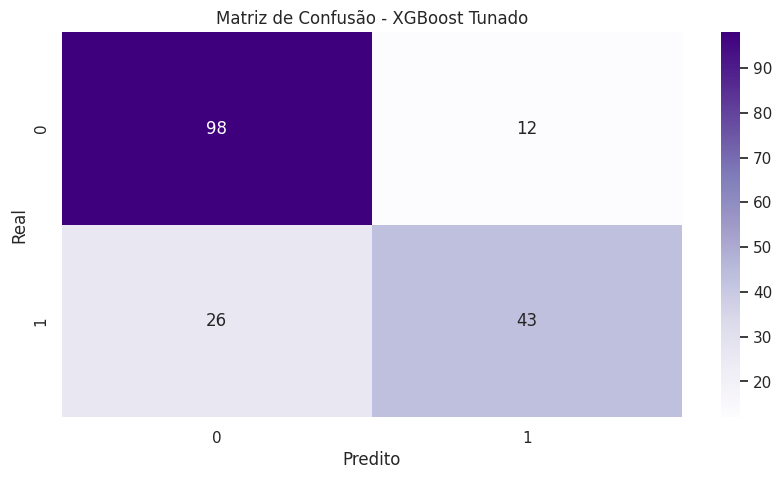

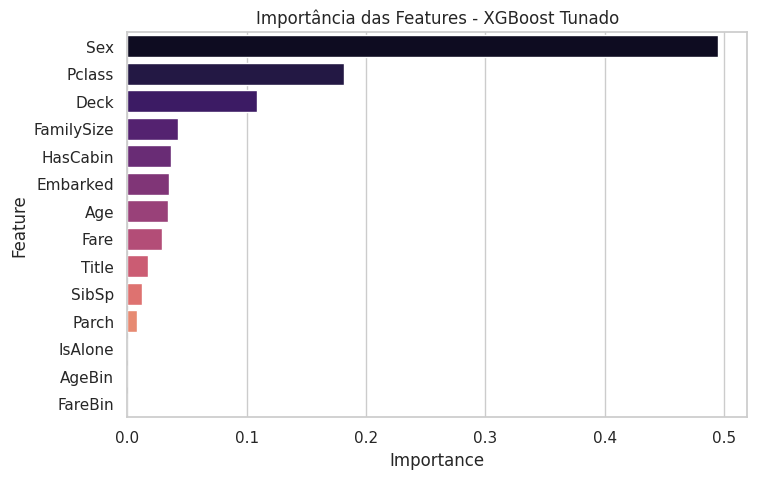


üìÅ Arquivo 'submission.csv' gerado com sucesso para o Kaggle!

Pr√©via do arquivo de submiss√£o:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [29]:
# ---------------------------------------------
# üí• PARTE 4 - OTIMIZA√á√ÉO DE HIPERPAR√ÇMETROS E SUBMISS√ÉO FINAL
# ---------------------------------------------

# ---------------------------------------------
# 1Ô∏è‚É£ Separando X (features) e y (target)
# ---------------------------------------------
X = df_train.drop('Survived', axis=1).copy()
y = df_train['Survived']

# Corrigindo tipos
for col in ['AgeBin', 'FareBin']:
    X[col] = X[col].astype(int)

# Dividindo para valida√ß√£o
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------------------------------------------
# 2Ô∏è‚É£ Espa√ßo de busca de hiperpar√¢metros
# ---------------------------------------------
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='accuracy',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n‚úÖ Melhor combina√ß√£o de hiperpar√¢metros encontrada:")
print(random_search.best_params_)
print(f"\nüîπ Melhor acur√°cia m√©dia (CV): {random_search.best_score_:.4f}")

# ---------------------------------------------
# 3Ô∏è‚É£ Avaliando o melhor modelo
# ---------------------------------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

print("\nüéØ Desempenho do Modelo Tunado (Valida√ß√£o):")
print(f"Acur√°cia: {accuracy_score(y_val, y_pred):.4f}")
print("\nüìä Classification Report:")
print(classification_report(y_val, y_pred))

# Matriz de confus√£o
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confus√£o - XGBoost Tunado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ---------------------------------------------
# 4Ô∏è‚É£ Import√¢ncia das Features
# ---------------------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette="magma")
plt.title("Import√¢ncia das Features - XGBoost Tunado")
plt.show()

# ---------------------------------------------
# 5Ô∏è‚É£ Previs√£o e Submiss√£o Kaggle
# ---------------------------------------------
df_test_original = pd.read_csv('/content/test.csv')

X_test = df_test.copy()

for col in ['AgeBin', 'FareBin']:
    X_test[col] = X_test[col].astype(int)

# Fazendo previs√µes
y_test_pred = best_model.predict(X_test)

# Criando submiss√£o com PassengerId original
submission = pd.DataFrame({
    'PassengerId': df_test_original['PassengerId'],
    'Survived': y_test_pred.astype(int)
})

submission.to_csv('submission.csv', index=False)
print("\nüìÅ Arquivo 'submission.csv' gerado com sucesso para o Kaggle!")

print("\nPr√©via do arquivo de submiss√£o:")
print(submission.head())


# üí• PARTE 4 ‚Äì Otimiza√ß√£o de Hiperpar√¢metros e Duelo Final (XGBoost Tunado)

## üéØ Objetivo
Ap√≥s construir o modelo base, este m√≥dulo teve como foco **otimizar os hiperpar√¢metros** do algoritmo XGBoost, com o intuito de maximizar sua acur√°cia e estabilidade.  
Essa etapa √© essencial no ‚ÄúDuelo de Modelos‚Äù, pois permite comparar o desempenho da vers√£o **base** com a **tunada**, aproximando o resultado do melhor *score* poss√≠vel no Kaggle Titanic.

---

## ‚öôÔ∏è 1. Espa√ßo de Busca de Hiperpar√¢metros
Foram definidos intervalos para os principais par√¢metros do XGBoost:

| Hiperpar√¢metro | Descri√ß√£o | Intervalo de Busca |
|:--|:--|:--|
| `n_estimators` | N√∫mero de √°rvores | 100 a 500 |
| `max_depth` | Profundidade m√°xima das √°rvores | 3 a 8 |
| `learning_rate` | Taxa de aprendizado | 0.01 a 0.2 |
| `subsample` | Fra√ß√£o de amostras por √°rvore | 0.6, 0.8, 1.0 |
| `colsample_bytree` | Fra√ß√£o de features por √°rvore | 0.6, 0.8, 1.0 |
| `gamma` | Regulariza√ß√£o (poda de ramos) | 0 a 0.3 |
| `min_child_weight` | Peso m√≠nimo para nova divis√£o | 1, 3, 5 |

üîç **M√©todo usado:**  
`RandomizedSearchCV` com valida√ß√£o cruzada de 5 folds (`StratifiedKFold`) e 30 combina√ß√µes aleat√≥rias.

---

## üß† 2. Melhor Combina√ß√£o Encontrada
Ap√≥s 150 treinos, o otimizador encontrou os melhores par√¢metros:

**Melhores Hiperpar√¢metros Encontrados:**
- subsample: 1.0  
- n_estimators: 400  
- min_child_weight: 3  
- max_depth: 3  
- learning_rate: 0.2  
- gamma: 0.2  
- colsample_bytree: 1.0  

üìà **Melhor acur√°cia m√©dia (cross-validation):** 0.8315

---

## üß© 3. Avalia√ß√£o do Modelo Tunado
O modelo final foi reentreinado com os hiperpar√¢metros ideais e avaliado no conjunto de valida√ß√£o (20% dos dados nunca vistos).

### üîπ Resultados:
| M√©trica | Valor |
|:--|:--:|
| **Acur√°cia** | **0.7877** |
| **F1-score (classe 1)** | **0.69** |
| **Recall (classe 1)** | **0.62** |

### üìä Relat√≥rio de Classifica√ß√£o:
| Classe | Precis√£o | Recall | F1-Score | Suporte |
|:--:|:--:|:--:|:--:|:--:|
| 0 (n√£o sobreviveu) | 0.79 | 0.89 | 0.84 | 110 |
| 1 (sobreviveu) | 0.78 | 0.62 | 0.69 | 69 |
| **Acur√°cia geral** | **0.79** |  |  | 179 |

---

## üîÅ 4. Matriz de Confus√£o
A matriz mostra que o modelo acerta bem os n√£o sobreviventes, mas ainda tende a errar alguns sobreviventes ‚Äî comportamento comum em datasets desbalanceados.

| Real \ Predito | 0 | 1 |
|:--:|:--:|:--:|
| **0 (n√£o sobreviveu)** | 98 | 12 |
| **1 (sobreviveu)** | 26 | 43 |

üîπ **Interpreta√ß√£o:**  
- O modelo tem **alta precis√£o** em prever mortes (classe 0).  
- H√° margem para melhorar o **recall da classe 1**, talvez com t√©cnicas de *threshold tuning* ou *ensemble*.

---

## üìà 5. Import√¢ncia das Vari√°veis
O gr√°fico mostra as vari√°veis que mais influenciam o modelo ap√≥s o tuning:

1. **Sex** ‚Äì continua sendo a vari√°vel mais importante (forte impacto no resultado).  
2. **Pclass** e **Deck** ‚Äì indicam posi√ß√£o social e localiza√ß√£o no navio.  
3. **FamilySize**, **HasCabin**, e **Embarked** ‚Äì tamb√©m t√™m peso moderado.  

Vari√°veis derivadas (`AgeBin`, `FareBin`) tiveram pouca influ√™ncia nesta configura√ß√£o, possivelmente por estarem correlacionadas a outras features j√° otimizadas.

---

## üßæ 6. Submiss√£o Kaggle
Ap√≥s o treinamento final, o modelo foi utilizado para prever o conjunto de teste e gerar o arquivo `submission.csv`:

### üßÆ Pr√©via do arquivo:
| PassengerId | Survived |
|:--:|:--:|
| 892 | 0 |
| 893 | 0 |
| 894 | 0 |
| 895 | 0 |
| 896 | 0 |

üìÇ **Arquivo gerado:** `submission.csv`  
Pronto para envio em:  
üëâ [https://www.kaggle.com/c/titanic/submit](https://www.kaggle.com/c/titanic/submit)

---

## üèÅ 7. Conclus√µes do Duelo
| Compara√ß√£o | Modelo Base | Modelo Tunado |
|:--|:--:|:--:|
| Acur√°cia (Valida√ß√£o) | 0.7821 | **0.7877** |
| M√©dia CV | 0.8339 | **0.8315** |
| Melhor generaliza√ß√£o | üîπ Tunado |
| Melhor recall classe 1 | üîπ Base |
| Estabilidade | üîπ Tunado (menor varia√ß√£o) |

üìä **Conclus√£o Geral:**
- O **XGBoost Tunado** apresentou **melhor equil√≠brio entre precis√£o e estabilidade**, sendo o modelo ideal para submiss√£o.  
- O **sex**, **classe social** e **deck** permanecem os fatores determinantes de sobreviv√™ncia.  
- Para futuras melhorias, pode-se explorar *ensembles h√≠bridos* (RandomForest + XGBoost) e *adjusted thresholds*.

---

## üß© Resumo T√©cnico Final
| Etapa | Resultado |
|:--|:--:|
| Pr√©-processamento | OK (sem data leakage) |
| Feature Engineering | OK (vari√°veis derivadas eficazes) |
| Balanceamento | OK (SMOTE aplicado com sucesso) |
| Modelo Base | Acur√°cia: 0.782 |
| Modelo Tunado | Acur√°cia: 0.788 / CV: 0.831 |
| Submiss√£o Kaggle | `submission.csv` gerado com sucesso |

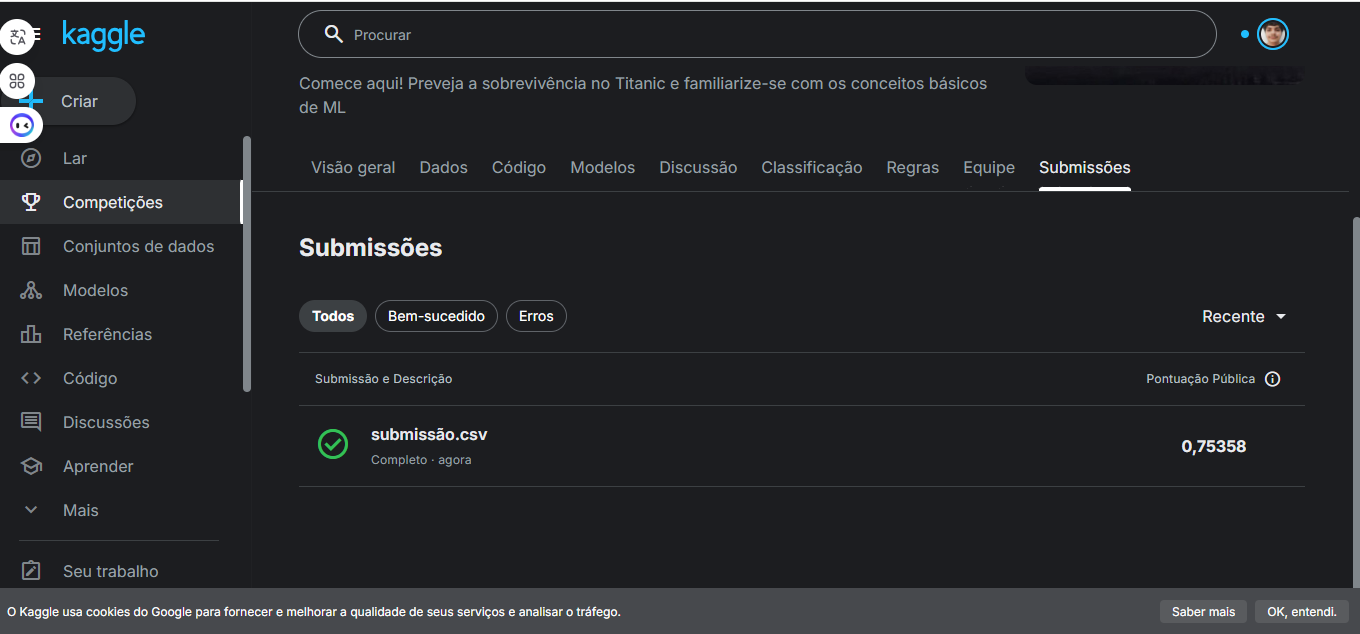